In [ ]:
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import sys

# modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.linear_model import LogisticRegression

# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# for data prep
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# for data exploration
from matplotlib import pyplot as plt

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


In [ ]:
import keras
keras.__version__

'2.4.3'

## 1. Introduction / Motivation / Literature Review (25 pts)

As technique developing, AI face recognition has wide applications. AI face recognition is a system that can identify a person’s identity from their face (AIT staff writer, 2020). For example, the face scan payment method has widespread in China mobile as a primary way to make purchase. (Feifei Liu, 2020). Scanning your face works as the secret of your account. But you need to upload a picture without makeup so that the machine can detect your five sense organs accurately. People uploading picture with makeup would deduct the accuracy of AI face identification (Lance Ng, 2019). Therefore, a model to detect whether users’ picture is with makeup or not is useful. By establishing this detecting system, the websites can automatically filter out the improper photos.

> 


Although in Western countries, it is a freedom for student to wear makeup in the school. People usually think that makeup is self-expression. It helps student to develop confidence and self-esteem (John Renz Rejano, 2020). However, Chinese primary schools, middle schools and high schools strictly forbid student wearing makeup. According to, study showed that women around the world waste 474 days of their lives applying makeup.( Elena Prokopets, 2015). Chinese educators think that schools are where we learn knowledge and learn how to be a good person. The first task is to accumulate knowledge from books, and then learn to be a good person. (Tencent, 2019). In China, the study pressure is huge. The College Entrance Examination admission percentage of key university is only 6%（Ross. H. & Wang. Y ,2010）. Hence, putting students’ most energy into study is important. A model to detect whether students wearing makeup or not is useful for schools managing their disciplines.

> 


In some serious situations, such as hospital, doctors and nurses not only are required to wear uniform, but also wear natural makeup or not wear makeup. Wearing uniform makes medical workers more professional and presentable when dealing with patients. Hence, it makes patient feel more comfortable (Izaan Uniforms,2019) Exaggerated makeup of nurse would distract colleagues and patients(Nurseadvisorofficial, 2020). Hence, a model to check whether medical workers wear exaggerated makeup or not is good to keep their professional outlook.

> 



Some plastic surgery hospitals also need this technology for their online consulting service, which requires customers to upload photos without make-up so they can more accurately detect customers' accurate facial features(Hoppe. I.C& et al, 2014).

> 


All in all, a model to detect whether a person wearing makeup or not has wide application. Companies who are hiring online, schools, hospitals and plastic surgery hospitals can all benefit from this technique. And it will help official administrations to increase their efficiency by fast-recognition make-up.


#Reference

1.	AIT staff writer.(2020,April) .AI Face Recognition Camera. Retrieved from https://aithority.com/ait-featured-posts/ai-face-recognition-camera/
2.	Feifei Liu.(May,2020)Case Study of Facial-Recognition Payment in China.Retrieved from https://www.nngroup.com/articles/face-recognition-pay/
3.	Lance Ng,(August,2019) How to Beat Facial Recognition.Retrieved from https://lancengym.medium.com/how-to-beat-facial-recognition-ab118a0c37fd
4.	John Renz Rejano.(October,2020), makeup should be allowed in school. Retrieved from https://www.change.org/p/makeup-should-be-allowed-in-school
5.	Elena Prokopets.(June,2015)Retrieved from https://www.lifehack.org/articles/lifestyle/6-bold-reasons-stop-wearing-makeup.html
6.	Tencent, (November, 2019). Why does the school forbid students to "make up"?.Retrieved from https://new.qq.com/omn/20181119/20181119A0QAVK.html
7.	Ross, H., & Wang, Y. (2010). The college entrance examination in China: An overview of its social-cultural foundations, existing problems, and consequences: Guest editors' introduction. Chinese Education & Society, 43(4), 3-10. 
8.	Izaan Uniforms .(2019).Importance of Wearing Professional Medical Uniforms.Retrieved from http://www.izaanuniforms.com/blog/importance-of-wearing-professional-medical-uniforms/
9.	Nurseadvisorofficial.( 2020).5 Makeup Tips For Nurses. Retrieved from http://nurseadvisormagazine.com/tn-exclusive/5-makeup-tips-for-nurses/
10.	Hoppe, I. C., Lee, Y., Granick, M. S., & Scott, S. S. (2014). Digital store and forward imaging as a quality assessment tool for emergency plastic surgery consultations. Eplasty, 14.


## 2. Data Gathering and Description (20 pts)

We manually collected the data from Internet, dividing them into two categories: images of human faces with makeup and images of makeup-free faces. Then we extract 400 of each class and put them into train dataset and put 100 of each class into test data. 

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# add data reading code here!

# path = "YOUR/PATH/HERE/" # make sure it has the slash / on the end! paste statement won't work otherwise!
path = '/content/drive/Shared drives/OPIM 5509 Introduction to Deep Learning/Project 2 - Image Classification/Make-up Images/'
train_dir = path + "train"
test_dir = path + "test"

In [ ]:
train_dir # notice no slash at the end!

'/content/drive/Shared drives/OPIM 5509 Introduction to Deep Learning/Project 2 - Image Classification/Make-up Images/train'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Modeling (20 pts)

#  1.1) Baseline model: simple CNN




*   Baseline model: simple CNN



In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) # this needs to match with our data prep - upcoming!
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
labels_batch

array([1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1.], dtype=float32)

In [ ]:
# early stopping callback
es = EarlyStopping(monitor='val_loss', 
                                   mode='min', # don't minimize the accuracy!
                                   patience=4,
                                  verbose = 1,
                                   restore_best_weights=True)

In [ ]:
import time

start = time.time()
print("hello")

history = model.fit_generator(
      train_generator,
      steps_per_epoch=40, # ideally...len(trainX) // BS == 800/20 == 40
      epochs=10,
      callbacks=[es],
      validation_data=test_generator,
      validation_steps=10)  # ideally...len(valX) // BS == 200/20  == 10
                            # Total number of steps (batches of samples) to validate before stopping.

end = time.time()
print(end - start)

In [ ]:
model.save('/content/drive/Shared drives/OPIM 5509 Introduction to Deep Learning/Project 2 - Image Classification/Make-up Images/cnn')

INFO:tensorflow:Assets written to: /content/drive/Shared drives/OPIM 5509 Introduction to Deep Learning/Project 2 - Image Classification/Make-up Images/cnn/assets


## Results & Discussion(30 pts) -  Simple CNN


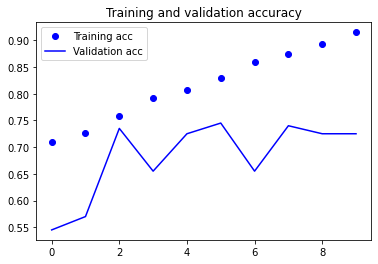

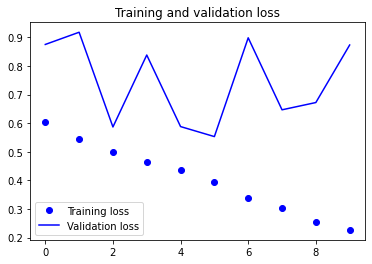

In [ ]:
# Plot the loss and accuracy of the model over the training and validation data during training:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The results of our first CNN model is apprently overfitting. Our training accuracy increases linearly over time, and the highest accuracy stalls at 88%. Our validation accuracy is bouncing and is always lower than training accuracy. 

As for loss, the training loss keeps decreasing linearly until it reaches nearly 0.28 while our validation loss is  bouncing around 0.7.

Because we only have relatively few training samples (800), overfitting is going to be our number one concern. 

We are going to use the following techniques in order to mitigate overfitting and increase accuracy of prediction:
1. Adding dropouts and weight decay 
2. Data augmentation 

# 1.2) CNN with dropouts and weight decay

In [ ]:
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.regularizers import l2

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3),
                        kernel_regularizer=l2(0.01), 
                        bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [ ]:
# early stopping callback
es = EarlyStopping(monitor='val_loss', 
                                   mode='min', # don't minimize the accuracy!
                                   patience=4,
                                  verbose = 1,
                                   restore_best_weights=True)

In [ ]:
import time

start = time.time()
print("hello")

history = model.fit_generator(
      train_generator,
      steps_per_epoch=40, # ideally...len(trainX) // BS == 800/20 == 40
       callbacks=[es],
      epochs=10,
      validation_data=test_generator,
      validation_steps=10)  # ideally...len(valX) // BS == 200/20  == 10
                            # Total number of steps (batches of samples) to validate before stopping.

end = time.time()
print(end - start)

hello
Epoch 1/10
40/40 [==============================] - 37s 934ms/step - loss: 0.6898 - acc: 0.6363 - val_loss: 0.7115 - val_acc: 0.6000
Epoch 2/10
40/40 [==============================] - 37s 919ms/step - loss: 0.5662 - acc: 0.7487 - val_loss: 0.6871 - val_acc: 0.6200
Epoch 3/10
40/40 [==============================] - 37s 913ms/step - loss: 0.5168 - acc: 0.7887 - val_loss: 0.5912 - val_acc: 0.7250
Epoch 4/10
40/40 [==============================] - 36s 912ms/step - loss: 0.5012 - acc: 0.7987 - val_loss: 0.6668 - val_acc: 0.6500
Epoch 5/10
40/40 [==============================] - 36s 910ms/step - loss: 0.4575 - acc: 0.8288 - val_loss: 0.6865 - val_acc: 0.6900
Epoch 6/10
40/40 [==============================] - 36s 909ms/step - loss: 0.4478 - acc: 0.8275 - val_loss: 0.6886 - val_acc: 0.6950
Epoch 7/10
40/40 [==============================] - 37s 913ms/step - loss: 0.4217 - acc: 0.8363 - val_loss: 0.5984 - val_acc: 0.7300
Epoch 00007: early stopping
264.3946273326874


In [ ]:
model.save('/content/drive/Shared drives/OPIM 5509 Introduction to Deep Learning/Project 2 - Image Classification/Make-up Images/cnn')

## Results & Discussion(30 pts)

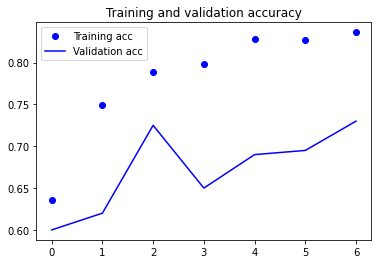

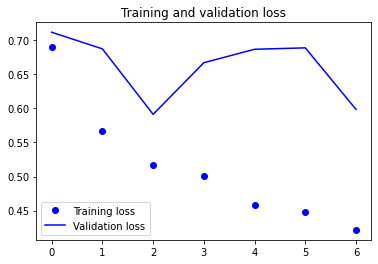

In [ ]:
# Plot the loss and accuracy of the model over the training and validation data during training:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- Compared with the last CNN model, the one with dropouts and weight decay performs better in training data, with the hightest accuracy reaching nearly 0.83 but a little higher in loss. 

- The performance for training data is still not satisfying, with highest accuracy merely approaching 0.73 and highest loss approaching 0.71, though the loss looks a little better than that for the last CNN model. 

- There is still room for improvement. Let's try data augmentation. 

# 1.3) CNN with Data augmentation

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.4,
      height_shift_range=0.4,
      shear_range=0.4,
      zoom_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
# we simply scale it by the max value (255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=40, # 800/20 = 40 (so we are grabbing 100 batches of size 32)
      epochs=10,
      validation_data=validation_generator,
      validation_steps=10) # so we are grabbing 50 batches of size 32)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
40/40 [==============================] - 42s 1s/step - loss: 0.7352 - acc: 0.5038 - val_loss: 0.6820 - val_acc: 0.5050
Epoch 2/10
40/40 [==============================] - 42s 1s/step - loss: 0.6506 - acc: 0.6162 - val_loss: 0.6833 - val_acc: 0.5800
Epoch 3/10
40/40 [==============================] - 42s 1s/step - loss: 0.6200 - acc: 0.6737 - val_loss: 0.6775 - val_acc: 0.6500
Epoch 4/10
40/40 [==============================] - 42s 1s/step - loss: 0.6107 - acc: 0.6525 - val_loss: 0.6791 - val_acc: 0.6400
Epoch 5/10
40/40 [==============================] - 42s 1s/step - loss: 0.5828 - acc: 0.7000 - val_loss: 0.6879 - val_acc: 0.6350
Epoch 6/10
40/40 [==============================] - 42s 1s/step - loss: 0.5795 - acc: 0.6925 - val_loss: 0.6017 - val_acc: 0.6750
Epoch 7/10
40/40 [==============================] - 42s 1s/step - loss: 0.5187 - acc: 0.7400 - val_loss: 0.6005 - val_acc: 0.6800
Epoch 8/

## Results & Discussion(30 pts)


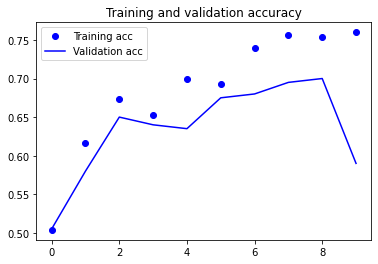

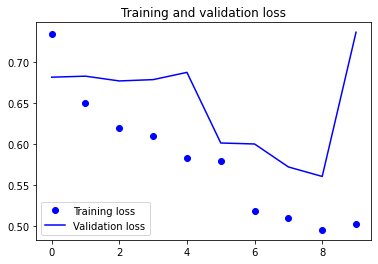

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

 - Overall, data augmentation didn't help much with improving accuracy or decreasing loss but we find the difference between training set and test set is actually smaller than the model before applying this technique. We got a fluctuating accuracy with the highest record of 0.7 in test set and 0.76 in training set. 
 - The performance of the model in the last epoch is not that good, showing a plummet in accuracy and a surge in loss. 

# 2.1) Perform Face Recognition With VGG16 in Keras

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # weights from imagenet - very important! otherwise it's just the network structure
                  include_top=False, # this means that our dense layer will be trained specific to our small data problem that we are solving
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# Freeze a the convolutional base

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 4


In [ ]:
conv_base.trainable = False

In [ ]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=40,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=10,
      verbose=2)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
40/40 - 224s - loss: 0.6936 - acc: 0.5387 - val_loss: 0.7131 - val_acc: 0.5850
Epoch 2/10
40/40 - 218s - loss: 0.6070 - acc: 0.6787 - val_loss: 0.6511 - val_acc: 0.6100
Epoch 3/10
40/40 - 216s - loss: 0.5374 - acc: 0.7588 - val_loss: 0.6761 - val_acc: 0.6300
Epoch 4/10
40/40 - 216s - loss: 0.4835 - acc: 0.7925 - val_loss: 0.6767 - val_acc: 0.6300
Epoch 5/10
40/40 - 216s - loss: 0.4705 - acc: 0.8037 - val_loss: 0.6242 - val_acc: 0.6450
Epoch 6/10
40/40 - 217s - loss: 0.4573 - acc: 0.8037 - val_loss: 0.6001 - val_acc: 0.6900
Epoch 7/10
40/40 - 216s - loss: 0.4423 - acc: 0.7925 - val_loss: 0.6247 - val_acc: 0.6700
Epoch 8/10
40/40 - 216s - loss: 0.4255 - acc: 0.8075 - val_loss: 0.6758 - val_acc: 0.6700
Epoch 9/10
40/40 - 219s - loss: 0.4023 - acc: 0.8300 - val_loss: 0.6457 - val_acc: 0.6750
Epoch 10/10
40/40 - 220s - loss:

In [ ]:
model.save('/content/drive/Shared drives/OPIM 5509 Introduction to Deep Learning/Project 2 - Image Classification/Make-up Images/VGG16')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/Shared drives/OPIM 5509 Introduction to Deep Learning/Project 2 - Image Classification/Make-up Images/VGG16/assets


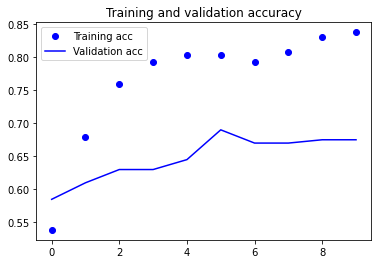

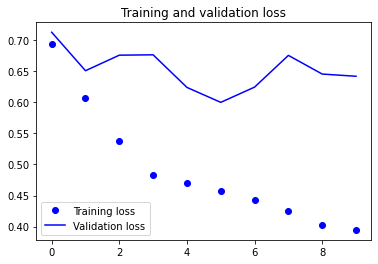

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Fine tuning

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

## Results & Discussion(30 pts)


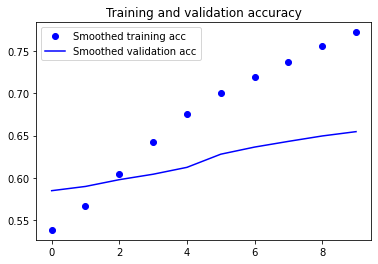

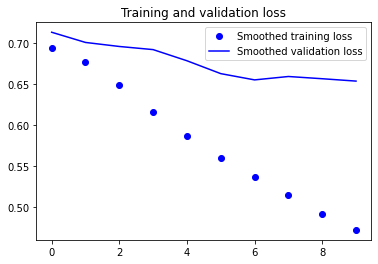

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

* VGG16 is considered to be one of the excellent vision model architecture till date. Nevertheless, it has 2 major drawbacks:
  1. It is very slow to train.
  2. The network architecture weights themselves are quite large (concerning disk/bandwidth).

* Though it might be helpful for some small datasets as a pretrained model, its participancy doesn't improve the accuracy or solve the over-fitting problems in our case even though it gives an increasing trend for accuracy. 

# Conclusion (5 pts)

* Image classification is a flagship example of the capability of the Deep Learning technology. To create a good optimized model, it requires lot of trial and error from user and informed guesses on  hyperparameters and epochs that needs to be run. Setting up the training data is also one of the more fundamental issues in the overall success of the model. We started with basic CNN model, and tweaked the model as we progressed to identify an image (with Make-up vs No-Makeup).Dropouts and weight decay along with data augmentation is used to fine tune the model, to deliver best results. We have also used VGG16 Convolutional Network for Classification and Detection, which was a bit slow to train. 

* Our classification model, will help identify an image, if it has makeup or does not have make-up. Same model with few tweaks can be used for face recognition, which has many applications. For example: Some plastic surgery hospitals would need this technology for their online consulting service, which requires customers to upload photos without make-up so they can accurately detect customers' facial features and help in diagnosis

* Cosmetic Industry have extensively using deep learning, and computer vision technology. In Sephora Stores, there is computer with web cam which automatically different cosmetics virtually so that users can easily buy the best suited product. Our model, which help in identifying whether makeup has been used or not, is one of the configuration which is used in that model. For example, amount of filters needs to proportionate with overall face makeup, so it is really important for the model to know if the try-out face has makeup or not

* In many situations, like nurses at hospitals especially the ones attending patients with special diseases wearing make-up isn’t always inappropriate. Our model can help detect it and act as a warning/reminder to protect them from wearing makeup at inappropriate spots

* Next step of our project can be to create OpenCV (which is a library of programming functions mainly aimed at real-time computer vision), model and it could be used to detect real-time make up vs no makeup. Same methodology can be used for other situations, like Mask vs No-Mask, we'd have to change the training/ test dataset from Make-up / Non-Make up images to Mask / No Mask image
